In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#查看tf 和 keras 的版本
print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


In [59]:
# 从 keras.datasets 里面 加载 fashion_mnist 的数据集（很多种类的黑白图片）
fashion_mnist = keras.datasets.fashion_mnist

#拆分训练集和测试集
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

#把训练集拆分成 训练集和验证集   验证集取前5000个数据， 训练集取5000以后的数据
x_vaild, x_train = x_train_all[:5000], x_train_all[5000:]
y_vaild, y_train = y_train_all[:5000], y_train_all[5000:]

#打印 训练集、验证集、测试集的格式    （通过结果可以发现，验证集有5000个28*28的numpy数组，像素位在0~255 的数据，训练集有55000个，测试集有10000个）
print(x_vaild.shape, y_vaild.shape)
print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
[4 0 7 ... 3 0 5]


**显示数据**
  - 定义显示单个图片的函数

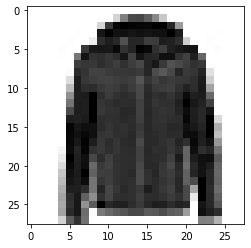

In [35]:
import matplotlib.pyplot as plt

def show_single_image(img_arr):
    
    #cmap 为 RGB values， 可查阅网址：https://blog.csdn.net/qq_28485501/article/details/82656614
    plt.imshow(img_arr, cmap='binary')
    plt.show()

#显示训练集的第一张图片
show_single_image(x_train[0]) 

  - 显示多个数据

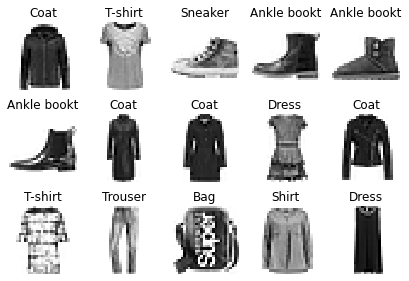

In [62]:
def show_images(n_rows, n_cols, x_data, y_data, class_names):
    '''
     4个参数：
     n_rows: 显示图片的行数
     n_cols: 显示图片的列数
     
    '''
    #验证 训练集的里的数据长度一致
    assert len(x_data) == len(y_data)
    #验证 列*宽的数据个数小于总的训练集数据个数
    assert n_rows * n_cols < len(x_data)
    
    
    # 定义样本图大小
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col  
            plt.subplot(n_rows, n_cols, index+1) 
            plt.imshow(x_data[index], cmap = 'binary',interpolation='nearest')
            
            #关闭 每个图的刻度线
            plt.axis('off')
            
            #定义每个图的标题为 class_name[] 对应的索引  此处需要注意的是 y_data->y_train , 而y_train就是一个label，用来对应class_name
            plt.title(class_name[y_data[index]])
    plt.show()
    
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle bookt']
show_images(3, 5, x_train, y_train, class_name)